# Detección de Objetos en Tiempo Real

Este proyecto implementa un reconocedor de objetos capaz de procesar una fuente de video en tiempo real, utilizando modelos de deep learning para detectar y clasificar objetos.



## Objetivo

Este proyecto implementa un reconocedor de objetos capaz de procesar una fuente de video en tiempo real, aplicando modelos de deep learning pre-entrenados para reconocimiento de objetos.

## Configuración del Entorno

Se configuran las bibliotecas necesarias para la captura de video, procesamiento de frames y aplicación de modelos de deep learning para detección de objetos.



In [14]:
%matplotlib inline

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage import data, io, filters
from skimage import transform

from IPython import display

import tensorflow as tf

import warnings
warnings.filterwarnings("ignore")

from utils import dibujar_img, dibujar_imgs

## Captura de Imágenes con la Webcam

Se implementa la conexión a una webcam y el procesamiento de frames de video en tiempo real. Para ello se utiliza OpenCV, una de las bibliotecas de visión por computadora más utilizadas. Se puede conectar a la webcam principal del sistema.



In [15]:
import cv2

# Elegimos el dispositivo de vídeo, por defecto 0 es el dispositivo principal.
cam = cv2.VideoCapture(0)

### Lectura de Frames

Una vez conectados a la cámara, se pueden leer frames individuales utilizando el método `read()`, que devuelve un código de estado y el frame capturado.



In [16]:
ret, frame = cam.read()

In [17]:
frame.shape

(1080, 1920, 3)

Una vez capturado el frame podemos parar de capturar con la webcam con:



In [18]:
cam.release()

Veamos ahora el frame que hemos obtenido:



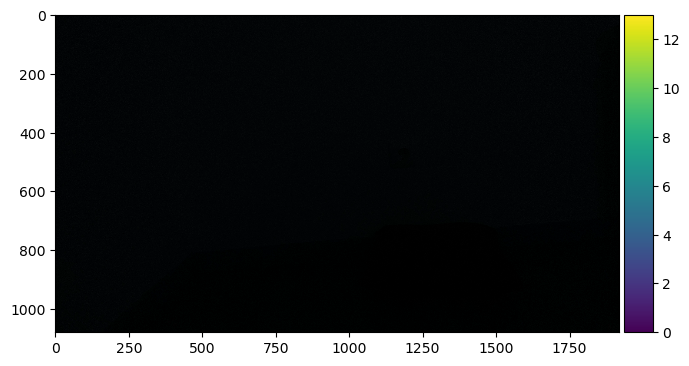

In [23]:
dibujar_img(frame)

Se analiza ves en la imagen para comprender las características de los datos.Como podrás ver los colores están distorsionados y esto es porque internamente `opencv` en vez de ordenar los píxels en formato `RGB` los ordena en formato `BGR`. Para convertir un formato a otro podemos usar la función de `opencv` `cvtColor` que nos permite reordenar los canales:



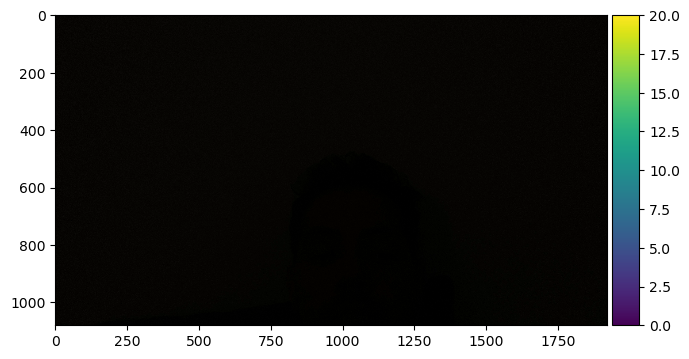

In [13]:
frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
dibujar_img(frame_rgb)

### Mostrando frames en movimiento Para mostrar una secuencia de video deberemos capturar de forma iterativa los frames e irlos mostrando en pantalla. Lo puedes ver en el siguiente ejemplo:



In [14]:
cam = cv2.VideoCapture(0)
try:
    while True:
        # Capturamos el frame
        ret, frame = cam.read()
        
        if not ret:
            raise Exception("Cannot capture frame.")
        
        # Lo convertimos de BGR a RGB
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        # Limpiamos la salida anterior esperando al nuevo contenido
        display.clear_output(wait=True)
    
        # Haz lo que quieras con la imagen...
        
        # Mostramos la imagen
        im = plt.imshow(frame_rgb, animated=True)
                    
        plt.show()
    
except KeyboardInterrupt as ex:
    # Si paramos el bloque cancelamos el stream de vídeo.
    cam.release()
    print("Secuencia de video parada:\n\t{}".format(ex))
except Exception as e:
    cam.release()
    print("Secuencia de video parada:\n\t{}".format(e))

Secuencia de video parada:
	


## Se analiza

Y si no tengo webcam o estoy en un entorno cloud sin acceso físico al equipo. ##Si el equipo donde estás desarrollando el  no tiene acceso a una cámara, vamos a hacer algo equivalente a lo anterior pero leyendo un fichero de vídeo previamente grabado.<br /><br />Como puedes ver, el código es muy similar al anterior.



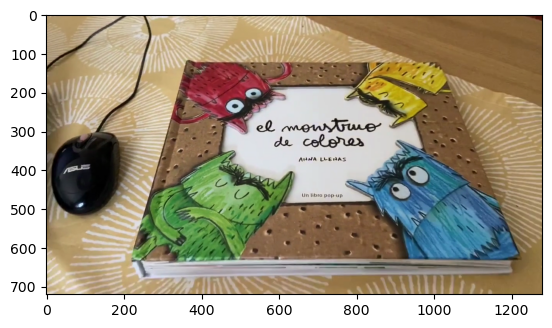

Secuencia de video parada:
	Cannot capture frame.


In [24]:
cam = cv2.VideoCapture('video/s6.challenge.mp4')
try:
    while True:
        # Capturamos el frame
        ret, frame = cam.read()
        
        if not ret:
            raise Exception("Cannot capture frame.")
        
        # Lo convertimos de BGR a RGB
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        # Limpiamos la salida anterior esperando al nuevo contenido
        display.clear_output(wait=True)
    
        # Haz lo que quieras con la imagen...
        
        # Mostramos la imagen
        im = plt.imshow(frame_rgb, animated=True)
                    
        plt.show()
    
except KeyboardInterrupt as ex:
    # Si paramos el bloque cancelamos el stream de vídeo.
    cam.release()
    print("Secuencia de video parada:\n\t{}".format(ex))
except Exception as e:
    cam.release()
    print("Secuencia de video parada:\n\t{}".format(e))


## Reconociendo objetos en tiempo real 

Una vez aquí ya tienes todo lo necesario para resolver este . Deberás capturar cada frame, procesarlo, mostrar la salida y así por cada frame.Si los resultados con `VGG19` no te convencen puedes probar cualquiera de los modelos preentrenados que se disponen en `Keras`: https://keras.io/applications/



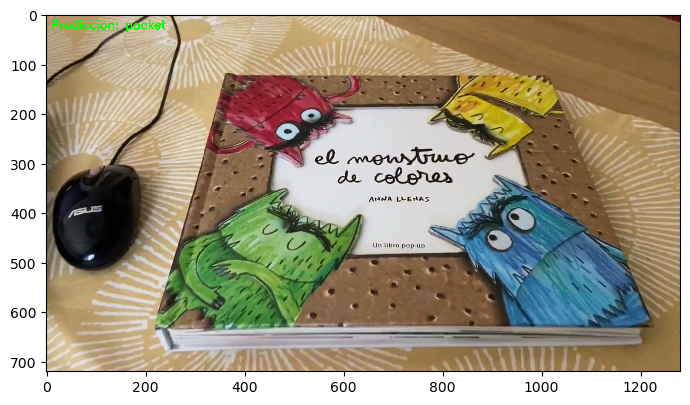

Fin del vídeo.
El stream de vídeo ha finalizado y los recursos han sido liberados.


In [25]:
from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input, decode_predictions

# Cargo el modelo VGG19 con los pesos pre-entrenados de ImageNet.
model = VGG19(weights='imagenet')

# Abro el stream de vídeo.
cam = cv2.VideoCapture('video/s6.challenge.mp4')

try:
    while True:
        # Capturo un fotograma del vídeo.
        ret, frame = cam.read()
        
        if not ret:
            print("Fin del vídeo.")
            break
        
        # Preparo el fotograma para que sea compatible con el modelo.
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        frame_resized = cv2.resize(frame_rgb, (224, 224))
        image_for_prediction = np.expand_dims(frame_resized, axis=0)
        image_for_prediction = preprocess_input(image_for_prediction)
        
        # Realizo la predicción sobre el fotograma.
        preds = model.predict(image_for_prediction, verbose=0)
        
        # Obtengo la etiqueta de la predicción con mayor confianza.
        label = decode_predictions(preds, top=1)[0][0][1]
        
        # Dibujo la etiqueta sobre el fotograma original.
        cv2.putText(frame, f"Prediccion: {label}", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)
        
        # Muestro el resultado en el notebook.
        display.clear_output(wait=True)
        dibujar_img(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

except KeyboardInterrupt:
    print("Proceso interrumpido por el usuario.")
finally:
    cam.release()
    print("El stream de vídeo ha finalizado y los recursos han sido liberados.")

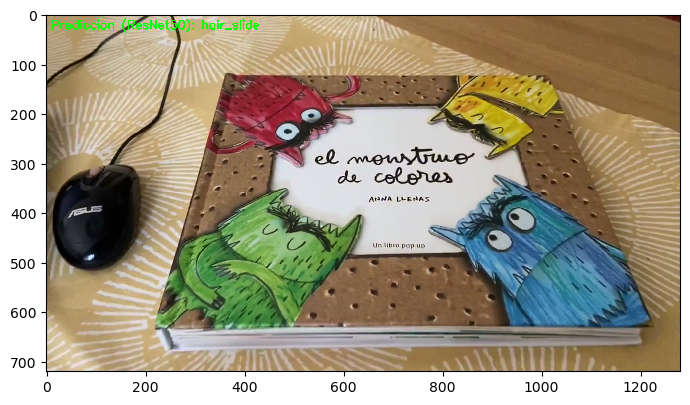

Fin del vídeo.
El stream de vídeo ha finalizado y los recursos han sido liberados.


In [26]:
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions

# Cargo el modelo ResNet50, una arquitectura de referencia por su eficiencia y profundidad.
model = ResNet50(weights='imagenet')

# Abro el stream de vídeo.
cam = cv2.VideoCapture('video/s6.challenge.mp4')

try:
    while True:
        # Capturo un fotograma del vídeo.
        ret, frame = cam.read()
        
        if not ret:
            print("Fin del vídeo.")
            break
        
        # Adapto el fotograma a los requerimientos específicos de ResNet50.
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        frame_resized = cv2.resize(frame_rgb, (224, 224))
        image_for_prediction = np.expand_dims(frame_resized, axis=0)
        image_for_prediction = preprocess_input(image_for_prediction)
        
        # Realizo la inferencia para clasificar el objeto en el fotograma.
        preds = model.predict(image_for_prediction, verbose=0)
        
        # Decodifico la predicción para obtener la etiqueta más probable.
        label = decode_predictions(preds, top=1)[0][0][1]
        
        # Superpongo la etiqueta de la predicción en el fotograma.
        cv2.putText(frame, f"Prediccion (ResNet50): {label}", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)
        
        # Muestro el resultado en el notebook.
        display.clear_output(wait=True)
        dibujar_img(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

except KeyboardInterrupt:
    print("Proceso interrumpido por el usuario.")
finally:
    cam.release()
    print("El stream de vídeo ha finalizado y los recursos han sido liberados.")